# Práctica 3: Aprendizaje automático supervisado

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjuntos de datos y aprender a interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 11__

__Nombres de los estudiantes: Alejandro Barrachina Argudo y Jaime Benedí Galdeano__

In [33]:
RANDOM_STATE = 11

# Apartado 2: Clasificación

## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene una enfermedad cardiovacular o no.

Crea un dataframe a partir del fichero `heart_failure.csv` que se proporciona junto con la práctica. Antes de nada, elimina las filas con valores nulos.



In [34]:
import pandas as pd
import seaborn as sns

In [35]:
df = pd.read_csv('heart_failure.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.





### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).



In [36]:
df_numericos = df.select_dtypes(include=['float64', 'int64'])

df_numericos.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


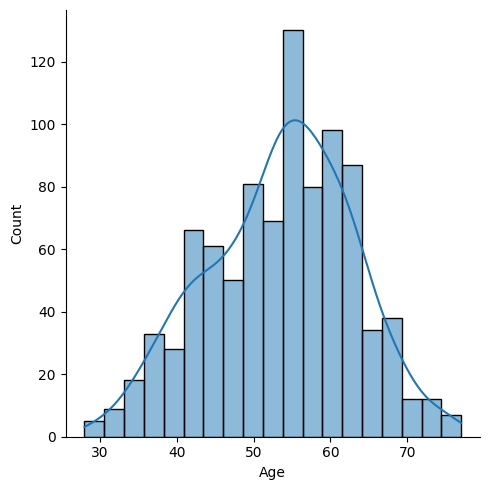

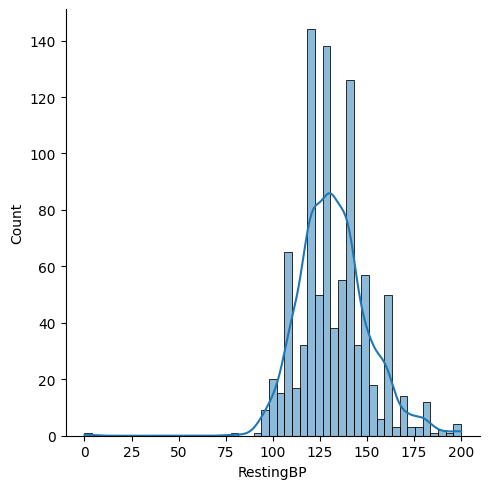

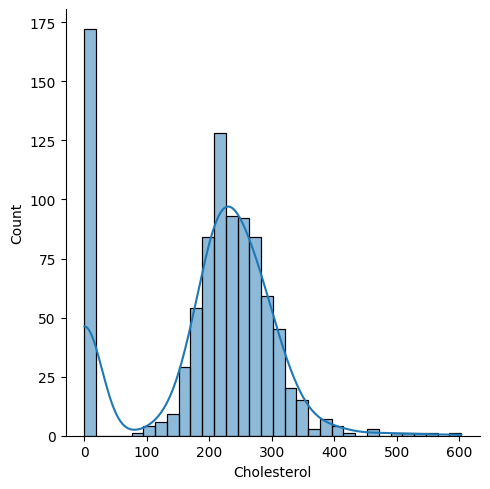

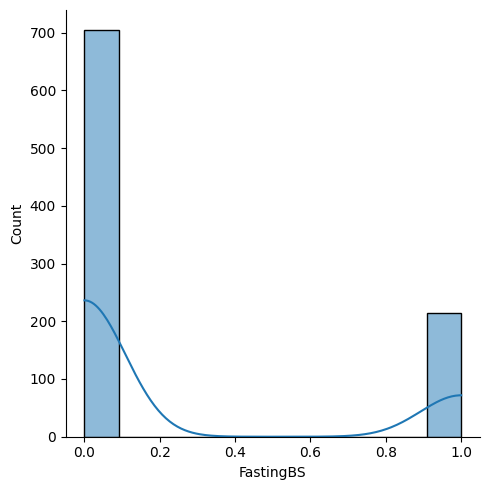

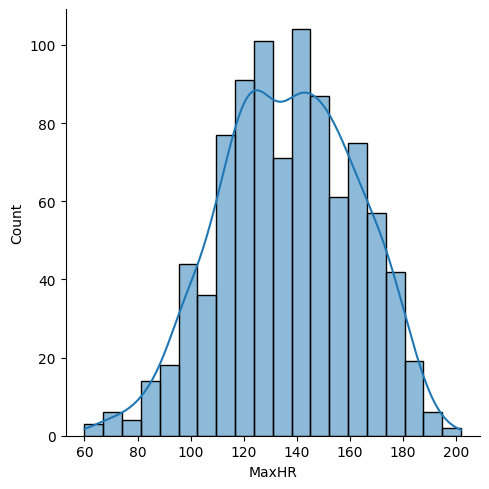

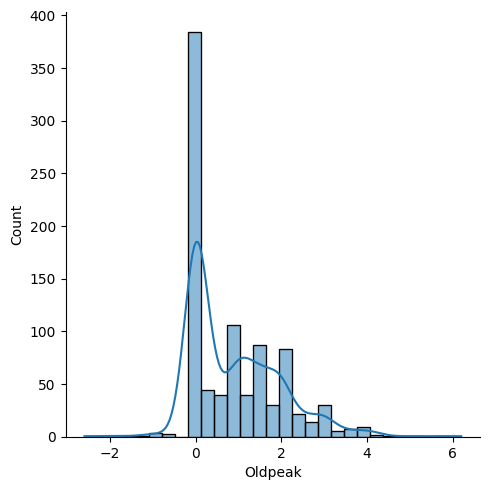

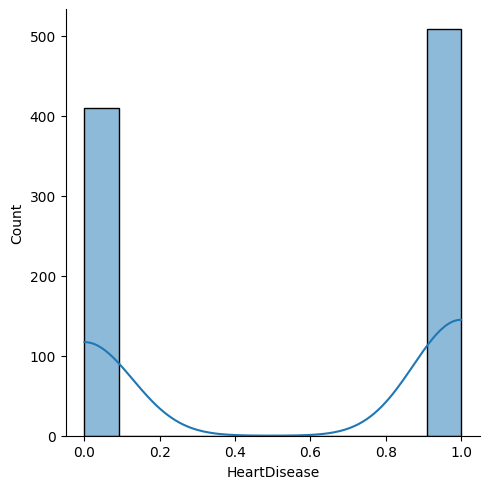

In [37]:
for column in df_numericos.columns:
    sns.displot(df_numericos[column], kde=True)

In [38]:
corr_num = df_numericos.corr()
corr_num

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [39]:
aux_num = []
for i in corr_num.index:
    for j in corr_num.columns:
        if i != j and (corr_num[i][j] < -0.6 or corr_num[i][j] > 0.6):
                if((i,j,corr_num[i][j]) not in aux_num and (j,i,corr_num[i][j]) not in aux_num): # eliminamos duplicados
                    aux_num.append((i, j, corr_num[i][j]))

print("Variables con fuerte ( > 0.6 o < -0.6 ) relación:")

aux_num

Variables con fuerte ( > 0.6 o < -0.6 ) relación:


[]

Podemos ver que las variables numéricas no tienen relación entre ellas, no se afectan unas a las otras.

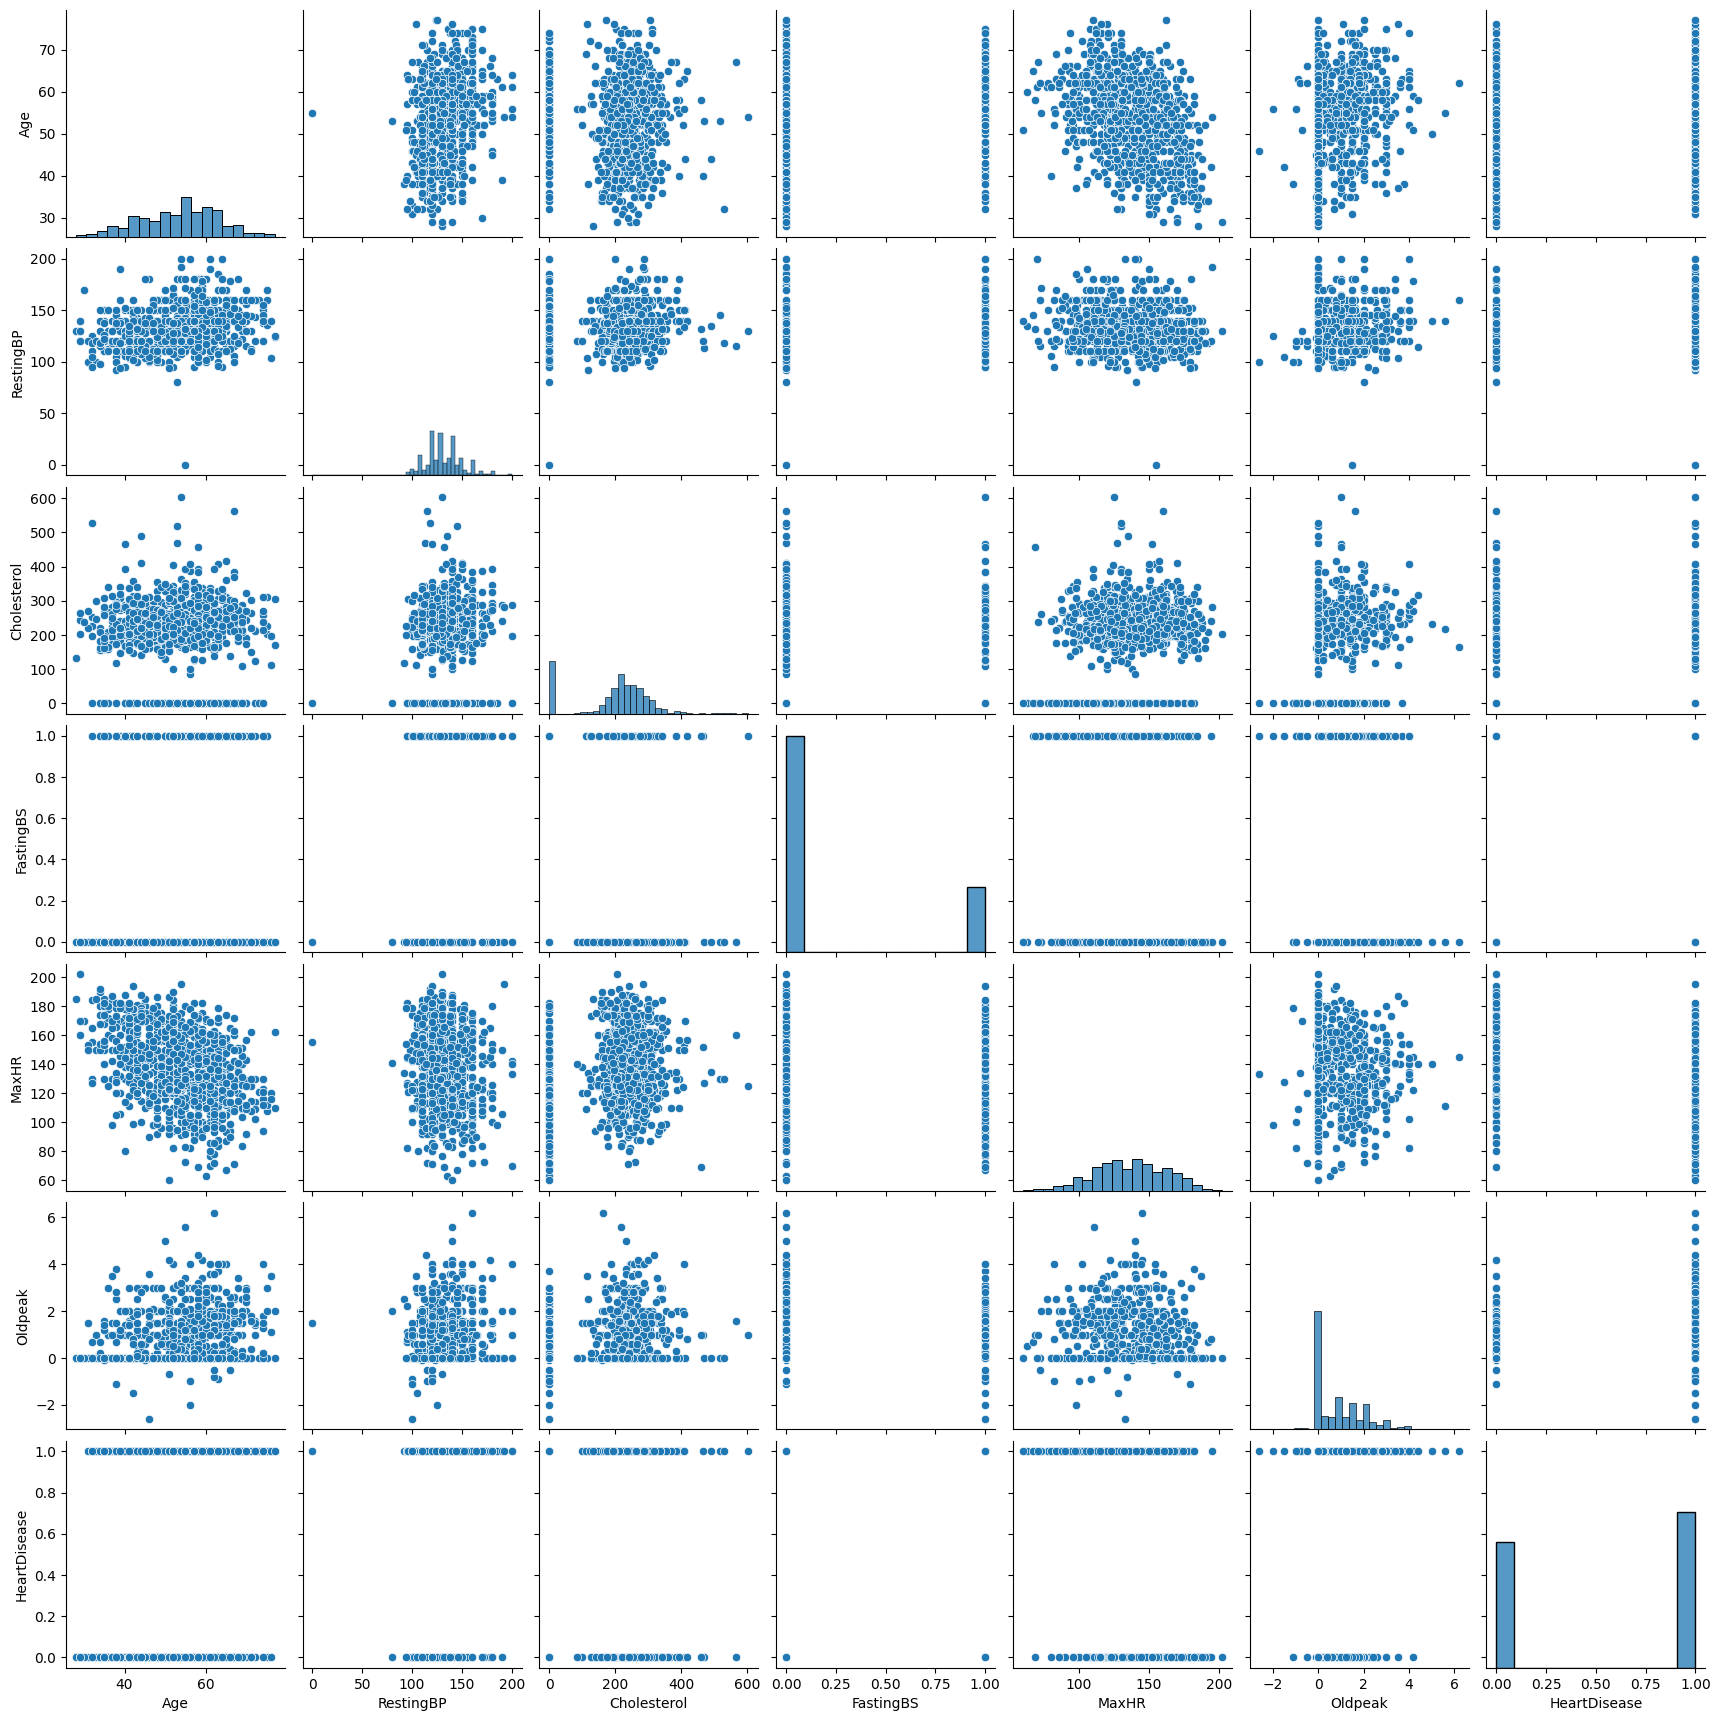

In [40]:
sns.pairplot(df_numericos)

En el gráfico de arriba, se ve todavía más claro que las variables no tienen relación entre ellas.

### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [41]:
df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


<Axes: xlabel='Sex', ylabel='count'>

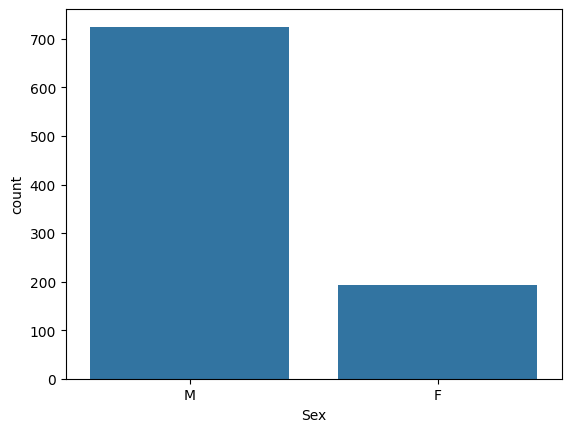

In [42]:
sns.countplot(x="Sex", data=df_categorical)

<Axes: xlabel='ChestPainType', ylabel='count'>

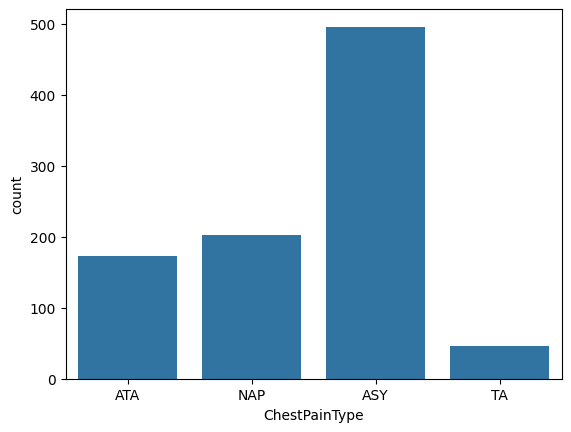

In [43]:
sns.countplot(x="ChestPainType", data=df_categorical)

<Axes: xlabel='RestingECG', ylabel='count'>

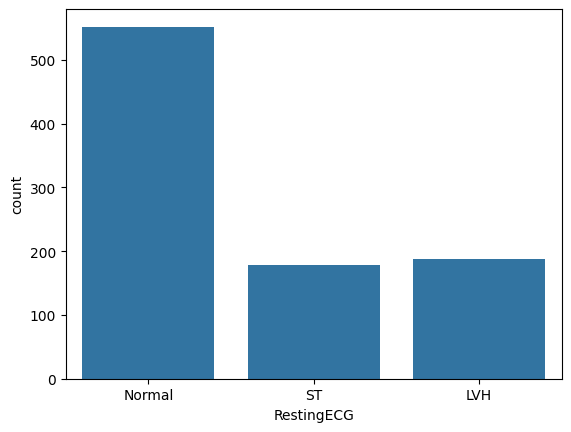

In [44]:
sns.countplot(x="RestingECG", data=df_categorical)

<Axes: xlabel='ExerciseAngina', ylabel='count'>

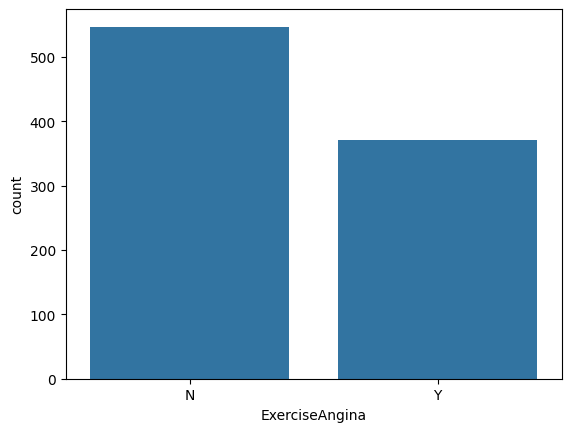

In [45]:
sns.countplot(x="ExerciseAngina", data=df_categorical)

<Axes: xlabel='ST_Slope', ylabel='count'>

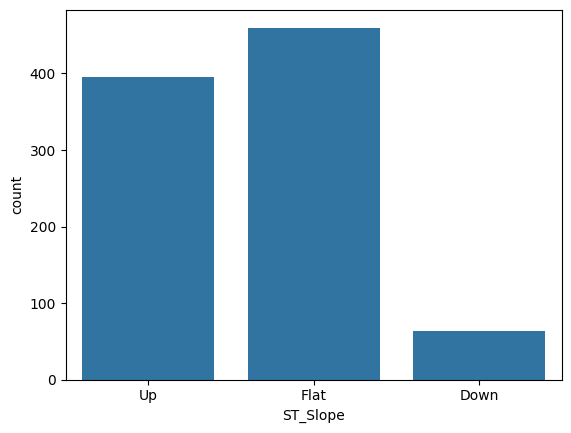

In [46]:
sns.countplot(x="ST_Slope", data=df_categorical)

In [47]:
for column in df_categorical.columns:
    df_categorical[column] = pd.factorize(df_categorical[column])[0]

df_categorical.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,0,0,0,0,0
1,1,1,0,0,1
2,0,0,1,0,0
3,1,2,0,1,1
4,0,1,0,0,0


In [48]:
corr_cat = df_categorical.corr()
corr_cat

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
Sex,1.000000,-0.179766,0.018343,-0.190664,-0.150693
ChestPainType,-0.179766,1.000000,0.112067,0.324049,0.352364
RestingECG,0.018343,0.112067,1.000000,0.036119,0.078807
ExerciseAngina,-0.190664,0.324049,0.036119,1.000000,0.428706
ST_Slope,-0.150693,0.352364,0.078807,0.428706,1.000000


## 3) Separa los datos en entrenamiento y test

Ajusta cada modelo de aprendizaje con los datos de entrenamiento y da una evaluación final con los datos de test.


In [51]:
# df_prep = df.drop(columns="HeartDisease")
df_prep = df.copy()
for column in df_prep.select_dtypes("object"):
    # if column.dtype == "object":
    df_prep[column] = pd.factorize(df_prep[column])[0]
df_prep.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0


## 4) Árboles de decisión

Aplica árboles de decisión para resolver el problema.


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
# Creamos un árbol de decisión con la configuración por defecto y lo entrenamos

df_data = df.drop(columns=["HeartDisease"], axis=1)
df_target = df["HeartDisease"].to_numpy()

data_cols = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

for column in df_data.select_dtypes("object"):
    df_data[column] = pd.factorize(df_data[column])[0]

df_data = df_data.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.3, random_state=RANDOM_STATE)
clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf = clf.fit(X_train, y_train)

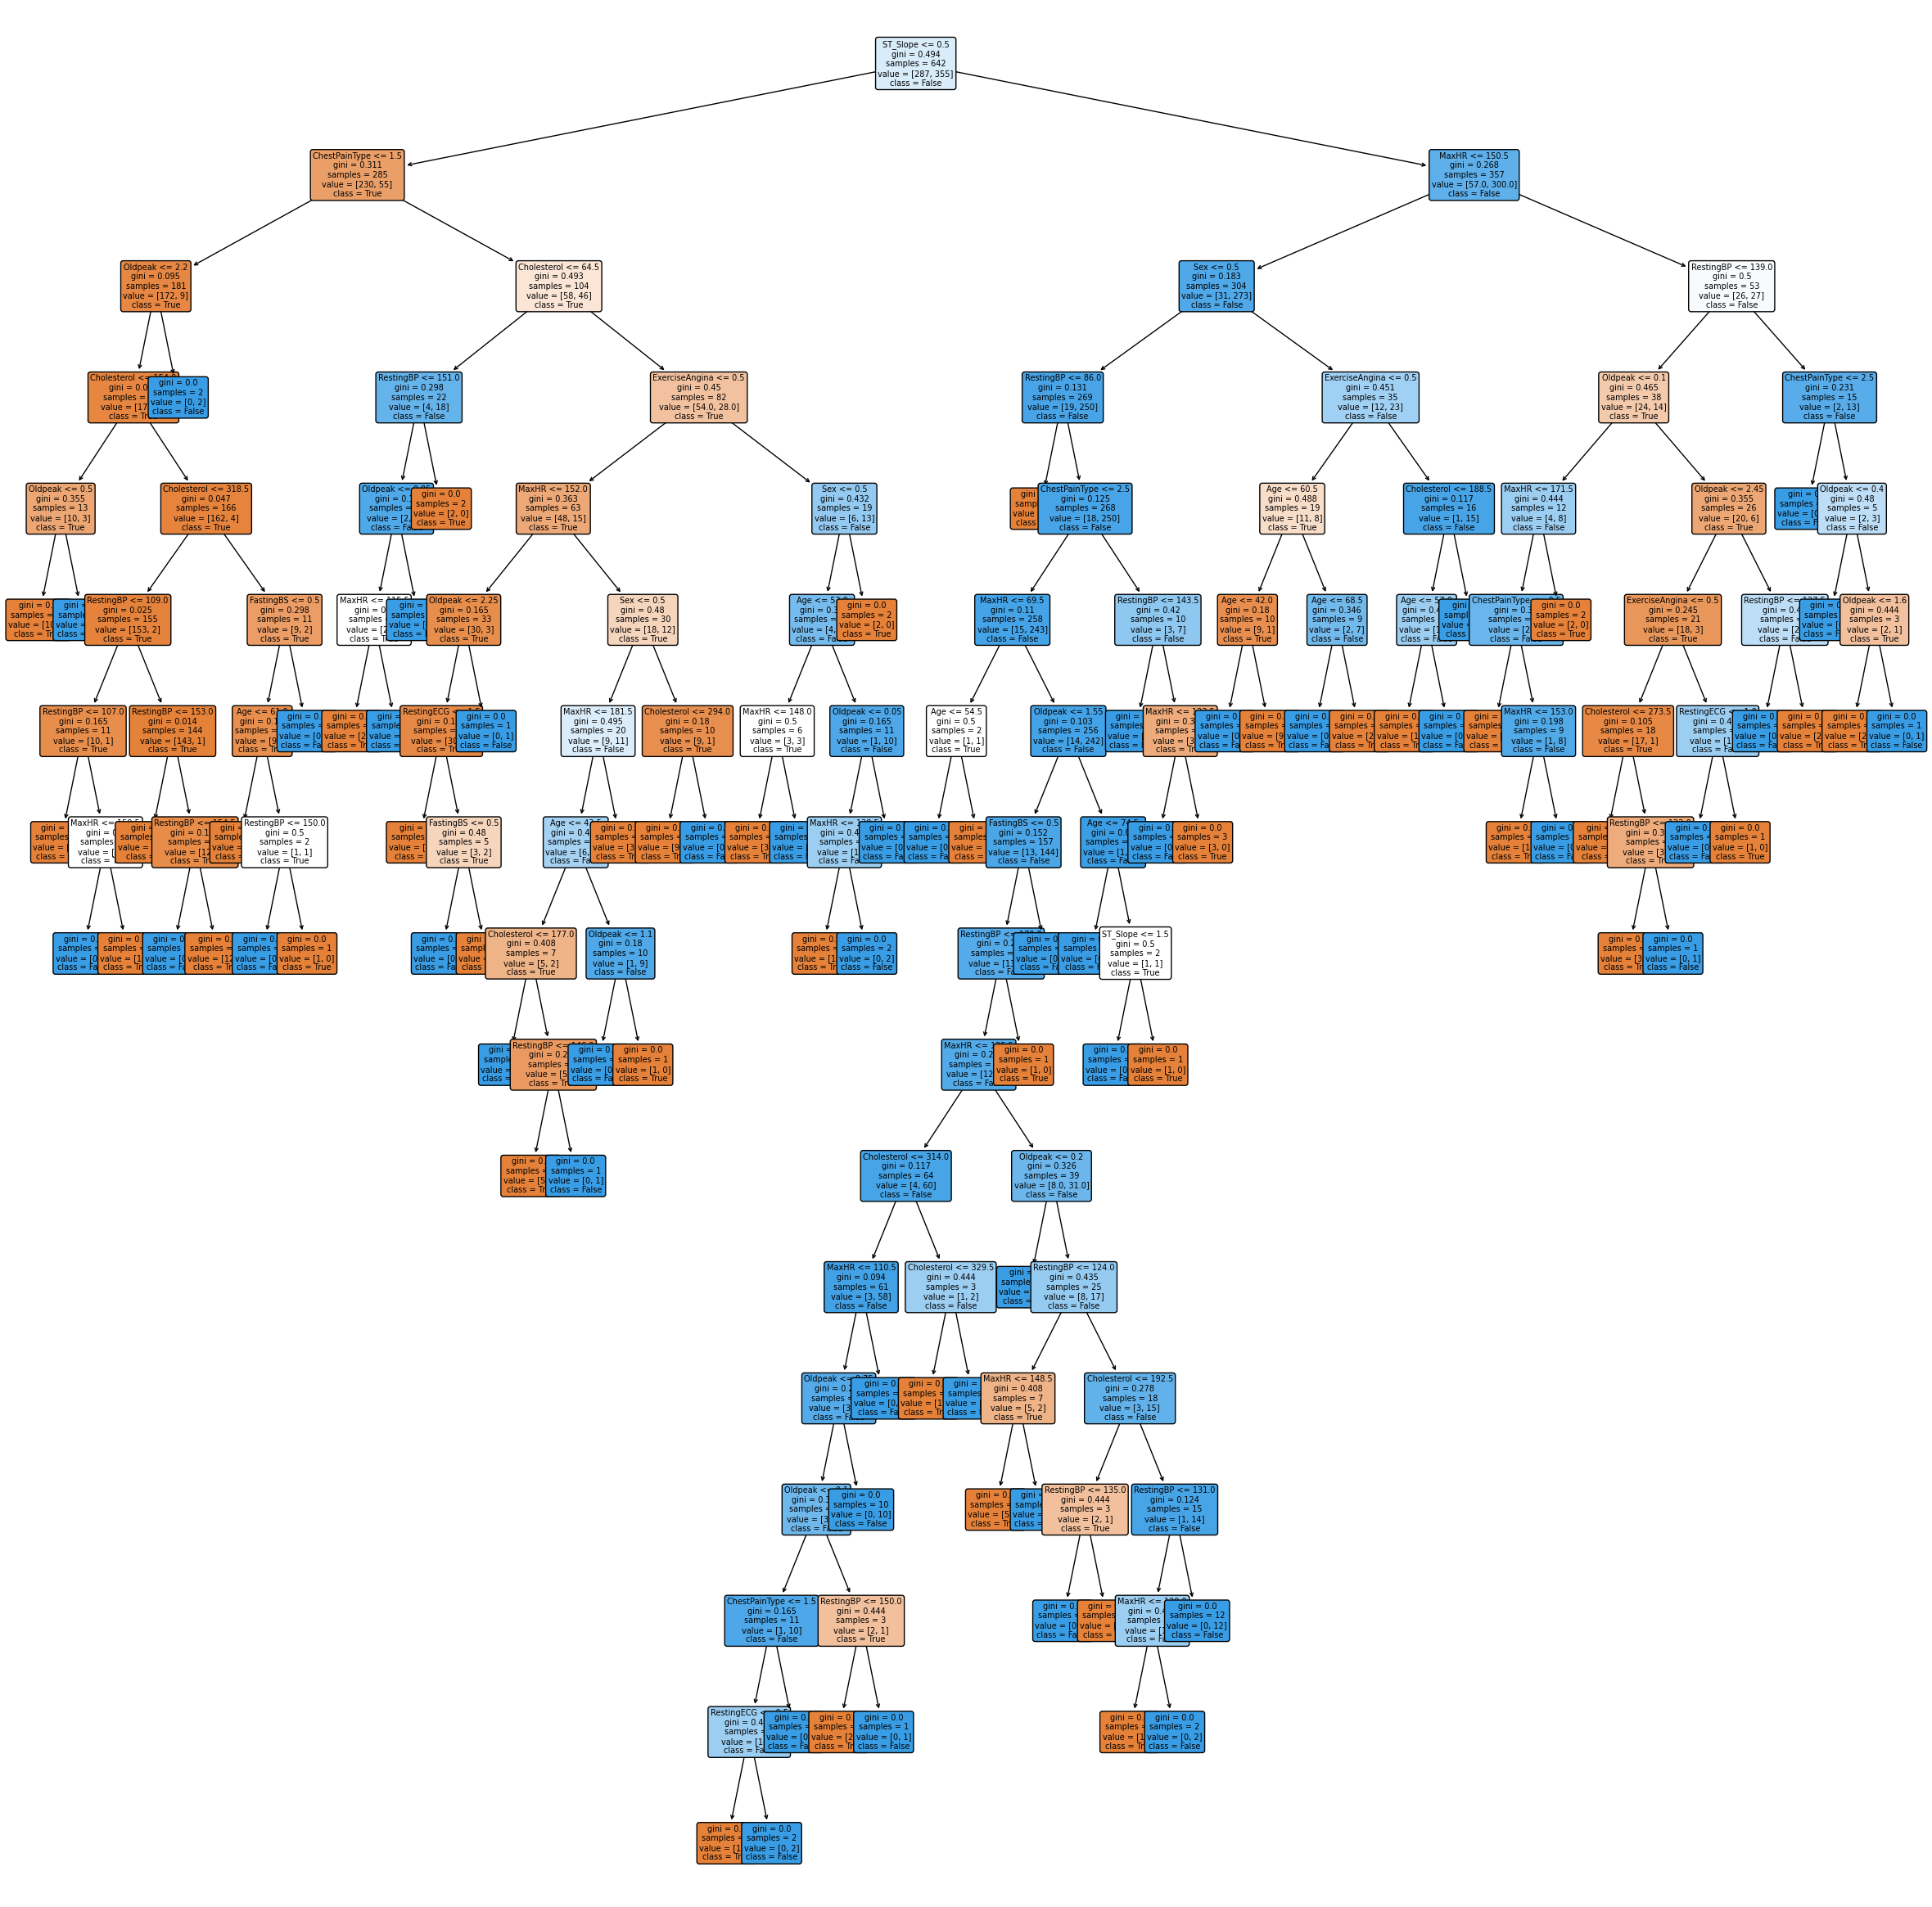

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pintamos el árbol
plt.figure(figsize=(30,30))
plot_tree(clf, filled=True, feature_names=data_cols, class_names=["True", "False"], rounded=True, fontsize=7)
plt.show()

### 4.1) Preprocesamiento de los datos

Decide si es conveniente preprocesar los datos de alguna manera. Justifica tu respuesta.

### 4.2) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes.

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.


### 4.3) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

## 5) Resuelve el mismo problema usando un clasificador k-NN

Busca el valor óptimo para el número de vecinos

## 6) Resuelve el mismo problema usando un clasificador MLP

Optimiza el coeficiente de regularización


## 7) Comparación de resultados

Muestra los resultados en test de los mejores modelos.
Discute cual es el mejor.